# Data Wrangling using WeRateDogs Twitter account

This project is for the data wranging aspect of the ND and uses the [WeRateDogs](https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) twitter account tweets

In [175]:
# import all packages needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import time
import json
import string
import datetime
import tweepy
import os

### Table of Contents
- [Gather](#Gather)
- [Assess](#Assess)
    - [Visual assessment](#Visual-assessment)
    - [Programmatic assessment](#Programmatic-assessment)
    - [Quality Issues](#Quality-Issues)
    - [Tidy Issues](#Tidy-issues)
- [Clean](#Clean)
    - [Cleaning operation 1](#Cleaning-operation-1)
    - [Cleaning operation 2](#Cleaning-operation-2)
    - [Cleaning operation 3](#Cleaning-operation-3)
    - [Cleaning operation 4](#Cleaning-operation-4)
    - [Cleaning operation 5](#Cleaning-operation-5)
    - [Cleaning operation 6](#Cleaning-operation-6)
    - [Cleaning operation 7](#Cleaning-operation-7)
    - [Cleaning operation 8](#Cleaning-operation-8)
    - [Cleaning operation 9](#Cleaning-operation-9)
    - [Cleaning operation 10](#Cleaning-operation-10)
    - [Cleaning operation 11](#Cleaning-operation-11)
    - [Cleaning operation 12](#Cleaning-operation-12)
    - [Cleaning operation 13](#Cleaning-operation-13)
- [Visualisation](#Visualisation)
    - [Insight one](#Insight-1)
    - [Insight two](#Insight-2)
    - [Insight three](#Insight-3)
    - [Insight four](#Insight-4)
    - [Insight five](#Insight-5)

## Gather
<a id=”Gather”></a>

a) Twitter archieve file

In [3]:
# read in CSV twitter archieve file
twi_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twi_arch.head()
# Retuns head of csv file

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
twi_arch.sample(5)
# Returns 5 random samples of the Pandas dataframe from twi_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1284,708479650088034305,NaN,NaN,2016-03-12 02:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bear. He's a Beneboop Cumberclap. Extreme...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708479650...,13,10,Bear,None,None,None,None
2328,666396247373291520,NaN,NaN,2015-11-16 23:23:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh goodness. A super rare northeast Qdoba kang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666396247...,9,10,None,None,None,None,None
1500,692158366030913536,NaN,NaN,2016-01-27 01:33:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Edgar. He's a Sassafras Puggleflash. N...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692158366...,10,10,Edgar,None,None,None,None
1315,706681918348251136,NaN,NaN,2016-03-07 03:24:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Katie. She's a Mitsubishi Hufflep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706681918...,12,10,Katie,None,None,None,None
1640,684147889187209216,NaN,NaN,2016-01-04 23:02:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Sweets the English Bulldog. Waves back...,NaN,NaN,NaN,https://vine.co/v/ib2nTOEuuOI,12,10,Sweets,None,None,pupper,None


In [6]:
twi_arch.info()
# returns info on dataframe such as datatypes and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

b ) Tweet image prediction

In [7]:
# Reading in tsv file about image prediction of dog type using neural networks
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
Dog_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [8]:
Dog_prediction.head()
# Returns head of dataframe with this table having predicitions of the top three types of dog

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
Dog_prediction.info()
# Returns info such as datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
Dog_prediction.sample(5)
# returns a sample of 5 random prediction rows from dataframe

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
672,683142553609318400,https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg,1,Leonberg,0.605851,True,chow,0.183470,True,German_shepherd,0.079662,True
456,674774481756377088,https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg,1,Chihuahua,0.407016,True,French_bulldog,0.309978,True,Siamese_cat,0.227677,False
830,693629975228977152,https://pbs.twimg.com/media/CaBEx3SWEAILZpi.jpg,1,pug,0.841987,True,French_bulldog,0.069791,True,Boston_bull,0.038720,True
92,667546741521195010,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False
1822,834786237630337024,https://pbs.twimg.com/media/C5XBp19WYAA5a_v.jpg,1,Border_terrier,0.156276,True,Norwegian_elkhound,0.125912,True,Boston_bull,0.096624,True


c) Twitter API and JSON

In [11]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Resource to do this https://stackoverflow.com/questions/44581647/retrieving-a-list-of-tweets-using-tweet-id-in-tweepy

In [12]:
# get tweet status
tweet = api.get_status(twi_arch.tweet_id[7], tweet_mode='extended')

In [14]:
# show tweet info
info = tweet._json
info

{'created_at': 'Fri Jul 28 00:22:40 +0000 2017',
 'id': 890729181411237888,
 'id_str': '890729181411237888',
 'full_text': "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq",
 'truncated': False,
 'display_text_range': [0, 118],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 890729118844600320,
    'id_str': '890729118844600320',
    'indices': [119, 142],
    'media_url': 'http://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg',
    'url': 'https://t.co/v0nONBcwxq',
    'display_url': 'pic.twitter.com/v0nONBcwxq',
    'expanded_url': 'https://twitter.com/dog_rates/status/890729181411237888/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 1200, 'h': 1328, 'resize': 'fit'},
     'medium': {'w': 1084, 'h': 1200,

In [15]:
# create tweet_json.txt file
file = 'tweet_json.txt'
if not os.path.isfile(file):
    open(file, 'w', encoding = 'UTF-8')

In [16]:
# create a tweet id list
tweet_ids = twi_arch.tweet_id.values

In [17]:
errors_tweets = []

# get the start time of query
print("Start time:", datetime.datetime.now().time())
start = time.time()

# write JSON to .txt file
with open('tweet_json.txt', 'w', encoding = 'UTF-8') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            print("Error in Tweet ID:", tweet_id, "Time:",  datetime.datetime.now().time())
            errors_tweets.append(tweet_id)

# get end time of query
end = time.time()
print("End time:", datetime.datetime.now().time())

# display runtime
print("Runtime: ", end - start)

Start time: 12:36:38.484531
Error in Tweet ID: 888202515573088257 Time: 12:36:46.788269
Error in Tweet ID: 873697596434513921 Time: 12:37:19.367169
Error in Tweet ID: 872668790621863937 Time: 12:37:21.944726
Error in Tweet ID: 872261713294495745 Time: 12:37:23.169658
Error in Tweet ID: 869988702071779329 Time: 12:37:29.376521
Error in Tweet ID: 866816280283807744 Time: 12:37:35.334785
Error in Tweet ID: 861769973181624320 Time: 12:37:44.908582
Error in Tweet ID: 856602993587888130 Time: 12:37:56.905799
Error in Tweet ID: 851953902622658560 Time: 12:38:13.434604
Error in Tweet ID: 845459076796616705 Time: 12:38:28.853324
Error in Tweet ID: 844704788403113984 Time: 12:38:31.443334
Error in Tweet ID: 842892208864923648 Time: 12:38:34.366589
Error in Tweet ID: 837366284874571778 Time: 12:38:50.007260
Error in Tweet ID: 837012587749474308 Time: 12:38:50.799111
Error in Tweet ID: 829374341691346946 Time: 12:39:28.521273
Error in Tweet ID: 827228250799742977 Time: 12:39:36.668807
Error in Twe

Rate limit reached. Sleeping for: 441


Error in Tweet ID: 754011816964026368 Time: 12:51:01.232211
Error in Tweet ID: 680055455951884288 Time: 12:56:28.637818


Rate limit reached. Sleeping for: 528


End time: 13:09:42.190199
Runtime:  1983.7056684494019


In [18]:
errors_tweets
# Returns the IDS of errors in tweets

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 771004394259247104,
 770743923962707968,
 759566828574212096,
 754011816964026368,
 680055455951884288]

In [19]:
df_tweets = []
dict_tweets = {}
with open('tweet_json.txt') as json_file:
    # data = json.loads(json_file)
    for line in json_file:
        data = json.loads(line)
        df_tweets.append({'tweet_id': data['id'],
                        'retweet_count': data['retweet_count'],
                        'favorite_count': data['favorite_count']})
# extracts data from tweet_json.txt from above

In [20]:
api = pd.DataFrame(df_tweets, columns= ['tweet_id',
                                           'retweet_count',
                                           'favorite_count'])
# creates a pandas dataframe for these tweets for tweed id, retweet count and favourite count

In [21]:
api.head()
# returns the head of the api dataframe

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7352,35010
1,892177421306343426,5481,30321
2,891815181378084864,3624,22802
3,891689557279858688,7535,38278
4,891327558926688256,8120,36556


In [22]:
api.info()
# Returns the info for this dataframe including count, datatype and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [23]:
api.to_csv('api_tweets.csv')
# Exports dataframe to a CSV file in directory 

## Assess


### Visual assessment 

In [24]:
twi_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [25]:
Dog_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [26]:
api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7352,35010
1,892177421306343426,5481,30321
2,891815181378084864,3624,22802
3,891689557279858688,7535,38278
4,891327558926688256,8120,36556
...,...,...,...
2326,666049248165822465,38,93
2327,666044226329800704,122,259
2328,666033412701032449,39,107
2329,666029285002620928,41,118


### Programmatic assessment 
This uses pandas functions to make assessments about the data prior to data wrangling

Twiter archieve

In [27]:
twi_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
twi_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1114,732732193018155009,NaN,NaN,2016-05-18 00:39:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralpher. He's an East Guinean Flop Dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732732193...,12,10,Ralpher,None,None,None,None
2271,667495797102141441,NaN,NaN,2015-11-20 00:12:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None,None,None,None
1639,684177701129875456,NaN,NaN,2016-01-05 01:00:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kulet. She's very proud of the flower ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,None,None,None,None
2018,672139350159835138,NaN,NaN,2015-12-02 19:44:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup has a heart on its ass and that is do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672139350...,12,10,None,None,None,None,None
849,766008592277377025,NaN,NaN,2016-08-17 20:27:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766008592...,11,10,Angel,None,None,None,None


In [29]:
sum(twi_arch['tweet_id'].duplicated())
#Are there any tweet_ids duplicated 
# There are no duplicated tweet IDs

0

In [30]:
print(twi_arch.loc[twi_arch.tweet_id == 892420643555336193, 'text']) 
# Look at text of a particular tweet

0    This is Phineas. He's a mystical boy. Only eve...
Name: text, dtype: object


In [52]:
print(sum(twi_arch.retweeted_status_user_id.value_counts()))
# there are 181 retweets

181


In [53]:
print(sum(twi_arch.retweeted_status_id.value_counts()))
# there are 181 retweets, 

181


In [54]:
print(sum(twi_arch.retweeted_status_timestamp.value_counts()))
# There are 181 retweets

181


In [31]:
twi_arch.name.value_counts()
# Some names are missing

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Snoop        1
Banditt      1
Lizzie       1
Petrick      1
Bilbo        1
Name: name, Length: 957, dtype: int64

In [32]:
# Looking a numerators and donominator 
twi_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [33]:
twi_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [34]:
print(twi_arch['text'][516])
# From visual assessment I wanted to look at this row, there is no num and demot for this row, i.e. no rating

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


Dog prediction

In [35]:
Dog_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
Dog_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
384,673343217010679808,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,1,Chihuahua,0.541408,True,Italian_greyhound,0.156891,True,miniature_pinscher,0.069556,True
407,673709992831262724,https://pbs.twimg.com/media/CVl_qbjW4AA8Mam.jpg,1,Chihuahua,0.330171,True,Siamese_cat,0.181580,False,kelpie,0.178227,True
1562,793500921481273345,https://pbs.twimg.com/media/CwMU34YWIAAz1nU.jpg,2,golden_retriever,0.326122,True,Labrador_retriever,0.219904,True,Chesapeake_Bay_retriever,0.163366,True
1572,795076730285391872,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,golden_retriever,0.888181,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True


In [37]:
sum(Dog_prediction.jpg_url.duplicated())
# 66 URLs are duplicated

66

In [38]:
Dog_prediction.p1_dog.value_counts()
# Looking at image predction values from neurel network - p1 values

True     1532
False     543
Name: p1_dog, dtype: int64

In [39]:
Dog_prediction.p2_dog.value_counts()
# Looking at image predction values from neurel network - p2 values

True     1553
False     522
Name: p2_dog, dtype: int64

In [40]:
Dog_prediction.p3_dog.value_counts()
# Looking at image predction values from neurel network - p3 values

True     1499
False     576
Name: p3_dog, dtype: int64

JSON - Tweets

In [41]:
api.sample(5)

,tweet_id,retweet_count,favorite_count
882,758099635764359168,9601,18473
186,855245323840757760,5510,0
1480,691820333922455552,1578,3811
1134,724049859469295616,1694,4157
617,793601777308463104,1583,7878


In [42]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [43]:
api.describe()
# Some tweets got no favourites with min value at 1, but at least every tweet got at least one retween, with min = 1

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2587.268554,7310.425139
std,6.823170e+16,4376.611417,11354.689818
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,524.500000,1267.000000
50%,7.182469e+17,1206.000000,3172.000000
75%,7.986692e+17,2995.000000,8934.500000
max,8.924206e+17,74255.000000,150496.000000


In [44]:
api.isnull().sum()
# Counts all the null values

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [45]:
api.retweet_count.value_counts()

434     6
212     5
356     5
455     5
303     5
       ..
6550    1
407     1
700     1
409     1
4098    1
Name: retweet_count, Length: 1678, dtype: int64

In [46]:
api.favorite_count.value_counts()

0        163
3269       4
1028       4
533        4
3138       4
        ... 
4677       1
4683       1
29263      1
3095       1
10208      1
Name: favorite_count, Length: 1979, dtype: int64

### Quality Issues

## Twitter Archieves
- There are retweets present, need to keep origional tweeets only 
- Several columns are not required - these include in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- Date is an object here, not datetime
- None values in archieve table
- values for numerator and rating denominator are not right in all instaneces
- Values for demoninator may be high, eg. 99/10 when there are multiple dogs in a single tweet
- Some names are not filled
- URLs columns has rows with duplicates or sources for other websites

## Dog predictions 
- Some column urls are duplicated (66) 

## API
- Some columns are labelled wrong, e.g. favorite_count in api table
- Need to remove retweets

### Tidy issues

- The columns doggo, floofer, pupper and puppo can be merged into a single column - tidy data. Data type would need to be change as a result

- Keep the confidence values with the highest score in the Dog_prediction table

- Merge tables into one new dataframe

Before cleaning we need to make copies of our dataframes. This is done as we may need to revisit data and do not want to edit on the raw data directly


In [78]:
twi_arch_clean = twi_arch.copy()
Dog_predictions_clean = Dog_prediction.copy()
api_clean = api.copy()

In [79]:
twi_arch_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [80]:
Dog_predictions_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [81]:
api_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7352,35010
1,892177421306343426,5481,30321
2,891815181378084864,3624,22802
3,891689557279858688,7535,38278
4,891327558926688256,8120,36556
...,...,...,...
2326,666049248165822465,38,93
2327,666044226329800704,122,259
2328,666033412701032449,39,107
2329,666029285002620928,41,118


## Clean

### Cleaning operation 1
#### Define 
There are retweets present in this dataset, we need to remove them. Since threre are 181 retweets, we can use any of the three retweet columns, i.e. 'retweeted_status_timestamp', 'retweeted_status_user_id' or 'retweeted_status_id' to find these rows and delete them so they don't affect further visualisations or insights generated.

#### Code

In [82]:
twi_arch_clean = twi_arch_clean[twi_arch_clean.retweeted_status_id.isnull()]
twi_arch_clean = twi_arch_clean[twi_arch_clean.retweeted_status_user_id.isnull()]
twi_arch_clean = twi_arch_clean[twi_arch_clean.retweeted_status_timestamp.isnull()]

#### Test

In [83]:
twi_arch_clean.info()
# We have only kept the origional tweets

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Test

### Cleaning operation 2
#### Define
Several columns are not needed now since retweeted tweets have been deleted

#### Code

In [84]:
twi_arch_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [85]:
twi_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Cleaning operation 3
#### Define 
Date is an object here, it should be date time.

#### Code

In [86]:
twi_arch_clean.timestamp = pd.to_datetime(twi_arch_clean.timestamp, 
                                          errors='coerce')

#### Test

In [87]:
twi_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Cleaning operation 4
#### Define 
None values in archieve table. These should be NaN for python

#### Code

In [88]:
twi_arch_clean =  twi_arch_clean.replace('None', np.nan)

#### Test

In [89]:
twi_arch_clean.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls           58
rating_numerator         0
rating_denominator       0
name                   680
doggo                 2088
floofer               2165
pupper                1941
puppo                 2150
dtype: int64

In [91]:
twi_arch_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1013,747219827526344708,2016-06-27 00:07:44+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Atticus. He's remaining calm but his c...,https://twitter.com/dog_rates/status/747219827...,11,10,Atticus,NaN,NaN,NaN,NaN
1383,700847567345688576,2016-02-20 01:00:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Crouton. He's a Galapagos Boonwiddle. Has...,https://twitter.com/dog_rates/status/700847567...,10,10,Crouton,NaN,NaN,NaN,NaN
1378,701570477911896070,2016-02-22 00:53:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Yoda. He's a Zimbabwean Rutabaga. Frea...,https://twitter.com/dog_rates/status/701570477...,9,10,Yoda,NaN,NaN,NaN,NaN
1591,686606069955735556,2016-01-11 17:50:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Horace. He was practicing his levitation,...",https://twitter.com/dog_rates/status/686606069...,10,10,Horace,NaN,NaN,NaN,NaN
662,790987426131050500,2016-10-25 18:44:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She has a cowboy hat on her nos...,https://twitter.com/dog_rates/status/790987426...,12,10,Misty,NaN,NaN,NaN,NaN


### Cleaning operation 5
#### Define 
values for numerator and denominator are not right in all instaneces, i.e. not the same as for values in tweets. Also they need to be 

#### Code

In [93]:
rating = twi_arch_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
twi_arch_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
twi_arch_clean['rating_denominator'] = rating['rating_denominator'].astype(float)

# This method was pointed out by Udaciy Reviwer. Previously, I had used location based on tweet_id
# this method is much better at extracting the necessary information and is more robust
# While the location techniuqe works in this instane as only five tweets to fix, if the dataframe had millions of rows
# this previous method would not have scaled

#### Test

In [94]:
with pd.option_context('max_colwidth', 200):
    display(twi_arch_clean[twi_arch_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Ellen\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### Cleaning operation 6
#### Define 
Tweets with denomitor not equal to 10 are for multiple dogs.Convert to float

#### Code

In [95]:
twi_arch_clean['rating'] = 10 * twi_arch_clean['rating_numerator'] / twi_arch_clean['rating_denominator'].astype(float)

#### Test

In [96]:
twi_arch_clean.head(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,13.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,13.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,12.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,13.0


### Cleaning operation 7
#### Define 
Some names are not filled

#### Code

In [97]:
def find_names(df):
    list_names = []
    for line in df['text']:
        first_string = line.find('.')
        if first_string == -1:
            list_names.append(np.NaN)
        else:
            string_before = line[:first_string].rsplit(' ', 1)[-1]
            if string_before == string_before.title():
                wrong_string = ['This', 'Rhododendron', 'Setter', 'Epispocalian', 'Parthenon', 'Islands', 'We', 
                               'Unbelievable', 'Improvement', 'Airport', 'Tortoise', 'Christmas', '"Yep', '"So', '37',
                               'Pulitzer', 'Oh', 'St', 'Up', 'Xbox']
                if (len(string_before) > 15) or any(word in string_before for word in wrong_string) or any(c for c in string_before if c not in string.ascii_letters + "'") or (len(string_before) < 2):
                    list_names.append(np.NaN)
                else:
                    list_names.append(string_before)
            else:
                list_names.append(np.NaN)
    return list_names

In [98]:
list_names = find_names(twi_arch_clean)
twi_arch_clean.name = list_names

#### Test

In [99]:
twi_arch_clean.name.value_counts()
# names with no value have been removed. Returend 945 names

Charlie    13
Oliver     11
Lucy       10
Cooper     10
Tucker      9
           ..
Apollo      1
Ziva        1
Zeek        1
Sansa       1
Bilbo       1
Name: name, Length: 944, dtype: int64

### Cleaning operation 8
#### Define 
URLs columns has rows with duplicates or sources for other websites

#### Code

In [100]:
def clean_string(x):
    if not pd.notnull(x):
        return x
    if ',' in x:
        return x.rsplit(',', 1)[1]
    else:
        return x

In [101]:
twi_arch_clean['expanded_url_new'] = twi_arch_clean['expanded_urls'].apply(clean_string)

#### Test

In [102]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-102-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [103]:
twi_arch_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,expanded_url_new
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,13.0,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,13.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1


### Cleaning operation 9
#### Define 
Drop 66 jpg_url duplicated

#### Code

In [104]:
Dog_predictions_clean = Dog_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [105]:
sum(Dog_predictions_clean['jpg_url'].duplicated())

0

### Cleaning operation 10
#### Define 
Some columns are labelled wrong, i.e favorite should be favourite

#### Code

In [106]:
api_clean.rename(columns={'favorite_count': 'favourite_count'}, inplace=True)

#### Test

In [107]:
api_clean.head(2)

,tweet_id,retweet_count,favourite_count
0,892420643555336193,7352,35010
1,892177421306343426,5481,30321


### Cleaning operation 11
#### Define 
The columns doggo, floofer, pupper and puppo can be merged into a single column - tidy data. Data type would need to be change as a result

#### Code

In [108]:
twi_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   float64            
 6   rating_denominator  2175 non-null   float64            
 7   name                1395 non-null   object             
 8   doggo               87 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              234 non-null    object             
 11  puppo               25 non-null     object             
 12  rating              2175 non-null 

In [109]:
twi_arch_clean.reset_index(drop = True, inplace = True)

In [110]:
twi_arch_clean.loc[(twi_arch_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1];

In [111]:
dog_list =['doggo', 'floofer', 'pupper', 'puppo']

In [112]:
twi_arch_clean['dog_type'] = pd.np.empty((twi_arch_clean.shape[0], 0)).tolist()
# creates new column in dataframe for dogtype

<ipython-input-112-7aebbe18a5cd>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  twi_arch_clean['dog_type'] = pd.np.empty((twi_arch_clean.shape[0], 0)).tolist()


In [113]:
def d_type(archive_clean):    
    for i in range(twi_arch_clean.shape[0]):
        for x in dog_list:
            if x in twi_arch_clean.loc[i,['doggo', 'floofer', 'pupper', 'puppo']].tolist():
                twi_arch_clean.loc[i,'dog_type'].append(x)
            else:
                continue   
        twi_arch_clean.loc[i,'dog_type'] = ", ".join(archive_clean.loc[i,'dog_type'])
    twi_arch_clean.dog_type = archive_clean.dog_type.replace('',np.nan)

In [114]:
d_type(twi_arch_clean)

In [115]:
twi_arch_clean.loc[(twi_arch_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1].sample(6)
# checking 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,expanded_url_new,dog_type
1596,678021115718029313,2015-12-19 01:16:45+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Reese. He likes holding hands. 12/10 https://t.co/cbLroGCbmh,https://twitter.com/dog_rates/status/678021115718029313/photo/1,12.0,10.0,Reese,NaN,NaN,NaN,NaN,12.0,https://twitter.com/dog_rates/status/678021115718029313/photo/1,NaN
1551,679854723806179328,2015-12-24 02:42:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bruce. He's a rare pup. Covered in Frosted Flakes. Nifty gold teeth. Overall good dog. 7/10 would pet firmly https://t.co/RtxxACzZ8A,https://twitter.com/dog_rates/status/679854723806179328/photo/1,7.0,10.0,Bruce,NaN,NaN,NaN,NaN,7.0,https://twitter.com/dog_rates/status/679854723806179328/photo/1,NaN
105,870063196459192321,2017-05-31 23:43:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Clifford. He's quite large. Also red. Good w kids. Somehow never steps on them. Massive poops very inconvenient. Still 14/10 would ride https://t.co/apVOyDgOju,"https://twitter.com/dog_rates/status/870063196459192321/photo/1,https://twitter.com/dog_rates/status/870063196459192321/photo/1",14.0,10.0,Clifford,NaN,NaN,NaN,NaN,14.0,https://twitter.com/dog_rates/status/870063196459192321/photo/1,NaN
1390,687807801670897665,2016-01-15 01:25:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Trooper &amp; Maya. Trooper protects Maya from bad things like dognappers and Comcast. So touching. 11/10 for both https://t.co/c98k1IoZKy,https://twitter.com/dog_rates/status/687807801670897665/photo/1,11.0,10.0,Maya,NaN,NaN,NaN,NaN,11.0,https://twitter.com/dog_rates/status/687807801670897665/photo/1,NaN
2165,666058600524156928,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8.0,10.0,NaN,NaN,NaN,NaN,NaN,8.0,https://twitter.com/dog_rates/status/666058600524156928/photo/1,NaN
1565,679158373988876288,2015-12-22 04:35:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag,https://twitter.com/dog_rates/status/679158373988876288/photo/1,11.0,10.0,Rubio,NaN,NaN,NaN,NaN,11.0,https://twitter.com/dog_rates/status/679158373988876288/photo/1,NaN


In [116]:
twi_arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)
# Old columns can be removed

In [117]:
twi_arch_clean.dog_type = twi_arch_clean.dog_type.astype('category')
# Chaging data type

#### Test

In [118]:
twi_arch_clean.dog_type.value_counts()

pupper            224
doggo             75 
puppo             24 
doggo, pupper     10 
floofer           9  
doggo, puppo      1  
doggo, floofer    1  
Name: dog_type, dtype: int64

In [122]:
twi_arch_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,expanded_url_new,dog_type
1352,690015576308211712,2016-01-21 03:38:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper can only sleep on shoes. It's a crippling disease. Tearing his family apart. 12/10 I'd totally pet tho https://t.co/03XlvS8izg,"https://twitter.com/dog_rates/status/690015576308211712/photo/1,https://twitter.com/dog_rates/status/690015576308211712/photo/1",12.0,10.0,NaN,12.0,https://twitter.com/dog_rates/status/690015576308211712/photo/1,pupper
313,828381636999917570,2017-02-05 23:15:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9,https://twitter.com/dog_rates/status/828381636999917570/photo/1,14.0,10.0,Doobert,14.0,https://twitter.com/dog_rates/status/828381636999917570/photo/1,doggo
647,772581559778025472,2016-09-04 23:46:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10.0,10.0,NaN,10.0,https://twitter.com/dog_rates/status/772581559778025472/photo/1,NaN
674,768193404517830656,2016-08-23 21:09:14+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,https://twitter.com/dog_rates/status/768193404517830656/photo/1,8.0,10.0,Gerald,8.0,https://twitter.com/dog_rates/status/768193404517830656/photo/1,doggo
162,855862651834028034,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420.0,10.0,NaN,420.0,NaN,NaN


### Cleaning operation 12
#### Define 
Keep highest value for prediction - so only the heighest prediction dog value is kept. 1 column for dog and one column for confidence level

#### Code

In [123]:
dog_prediction = []
confidence_list = []

In [124]:
def image_prediction(Dog_predictions_clean):
    if Dog_predictions_clean['p1_dog'] == True:
        dog_prediction.append(Dog_predictions_clean['p1'])
        confidence_list.append(Dog_predictions_clean['p1_conf'])
    elif Dog_predictions_clean['p2_dog'] == True:
        dog_prediction.append(Dog_predictions_clean['p2'])
        confidence_list.append(Dog_predictions_clean['p2_conf'])
    elif Dog_predictions_clean['p3_dog'] == True:
        dog_prediction.append(Dog_predictions_clean['p3'])
        confidence_list.append(Dog_predictions_clean['p3_conf'])
    else:
        dog_prediction.append('Error')
        confidence_list.append('Error')
       
Dog_predictions_clean.apply(image_prediction, axis=1)


0       None
1       None
2       None
3       None
4       None
        ... 
2070    None
2071    None
2072    None
2073    None
2074    None
Length: 2009, dtype: object

In [125]:
Dog_predictions_clean['dog_prediction'] = dog_prediction
Dog_predictions_clean['confidence_list'] = confidence_list
# Creats new columns

<ipython-input-125-4f58de893e6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dog_predictions_clean['dog_prediction'] = dog_prediction
<ipython-input-125-4f58de893e6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dog_predictions_clean['confidence_list'] = confidence_list


In [129]:
Dog_predictions_clean = Dog_predictions_clean[Dog_predictions_clean['dog_prediction'] != 'Error']

In [131]:
Dog_predictions_clean.drop(['p1', 
                    'p1_conf',
                    'p1_dog',
                    'p2', 
                    'p2_conf',
                    'p2_dog',
                    'p3',
                    'p3_conf',
                    'p3_dog'], axis=1, inplace=True)
# Delete columns

#### Test

In [133]:
Dog_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1691 non-null   int64 
 1   jpg_url          1691 non-null   object
 2   img_num          1691 non-null   int64 
 3   dog_prediction   1691 non-null   object
 4   confidence_list  1691 non-null   object
dtypes: int64(2), object(3)
memory usage: 79.3+ KB


In [135]:
Dog_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,dog_prediction,confidence_list
1398,768473857036525572,https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg,1,Labrador_retriever,0.73917
172,669000397445533696,https://pbs.twimg.com/media/CUjETvDVAAI8LIy.jpg,1,Pembroke,0.82294
912,700847567345688576,https://pbs.twimg.com/media/CbnpI_1XIAAiRAz.jpg,1,Rhodesian_ridgeback,0.252514
47,666817836334096384,https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg,1,miniature_schnauzer,0.496953
980,707315916783140866,https://pbs.twimg.com/media/CdDkEkHWwAAAeUJ.jpg,2,Bernese_mountain_dog,0.979235


### Cleaning operation 13
#### Define 
Merge tables for tidyiness

#### Code

In [137]:
twi_arch_clean.tweet_id = twi_arch_clean.tweet_id.astype(str)
Dog_predictions_clean.tweet_id = Dog_predictions_clean.tweet_id.astype(str)
api_clean.tweet_id = api_clean.tweet_id.astype(str)
#  Converting tweet_id to string to merge for all tables

In [139]:
twi_arch_clean = pd.merge(twi_arch_clean, Dog_predictions_clean,
                        how = 'inner', on = 'tweet_id')
# Merging twi_arch and dog_predictions

In [140]:
twi_arch_clean = pd.merge(twi_arch_clean, api_clean,
                        how = 'inner', on = 'tweet_id')
# Merging first merge (twi_acch and dog_predictions) with remaining table (api_clean) to get retweet and favourite count for tweets

#### Test

In [141]:
twi_arch_clean.head(2)
# all three data sets were merged into one using tweet_id as primary key

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,expanded_url_new,dog_type,jpg_url,img_num,dog_prediction,confidence_list,retweet_count,favourite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,13.0,https://twitter.com/dog_rates/status/892177421306343426/photo/1,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,5481,30321
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,12.0,https://twitter.com/dog_rates/status/891815181378084864/photo/1,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,3624,22802


### Save our cleaned changes as an exported CSV file

In [147]:
twi_arch_clean.to_csv('twitter_clean_master.csv', index=False, encoding = 'utf-8')

## Visualisation

#### Insight 1

In [148]:
twi_arch_clean['dog_prediction'].value_counts()
# The most common dog is the golden retriever

golden_retriever      143
Labrador_retriever    101
Pembroke              94 
Chihuahua             87 
pug                   60 
                      .. 
clumber               1  
Japanese_spaniel      1  
EntleBucher           1  
silky_terrier         1  
Irish_wolfhound       1  
Name: dog_prediction, Length: 113, dtype: int64

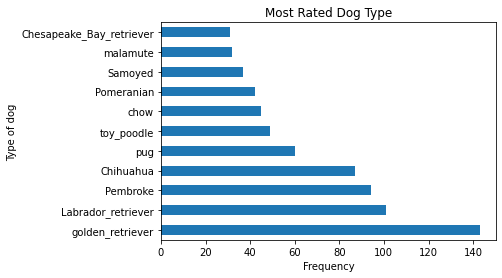

In [149]:
# Lets visualise this

dog_type = twi_arch_clean.groupby('dog_prediction').filter(lambda x: len(x) >= 30)
# Filtering dogs with a count above 30

dog_type['dog_prediction'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Type')
plt.xlabel('Frequency')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('MostRatedDogType.png',bbox_inches='tight');

The most common dogs are the golden retiever, labrador and pembroke

### Insight 2

The most popular dog names are Charlie, Cooper and Tucker

In [150]:
twi_arch_clean.name.value_counts().head(10)

Charlie    11
Cooper     10
Oliver     9 
Lucy       8 
Tucker     8 
Daisy      8 
Winston    7 
Toby       6 
Penny      6 
Koda       6 
Name: name, dtype: int64

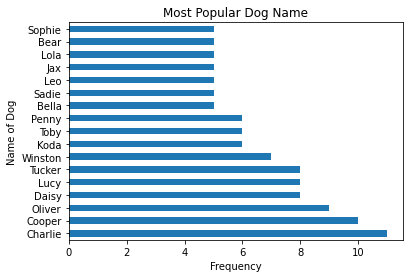

In [151]:
name = twi_arch_clean.groupby('name').filter(lambda x: len(x) >= 5)
# Filtering dog names with a count over 5

name['name'].value_counts().plot(kind = 'barh')
plt.title('Most Popular Dog Name')
plt.xlabel('Frequency')
plt.ylabel('Name of Dog')
fig.savefig('MostPopularNameofDog.png',bbox_inches='tight');

### Insight 3

the most popular dog type is pupper and doggo. Puppies really are the cutest.

In [152]:
count_dogs = twi_arch_clean.groupby('dog_type')['tweet_id'].count()
count_dogs

dog_type
doggo             51 
doggo, floofer    1  
doggo, pupper     6  
doggo, puppo      1  
floofer           7  
pupper            165
puppo             20 
Name: tweet_id, dtype: int64

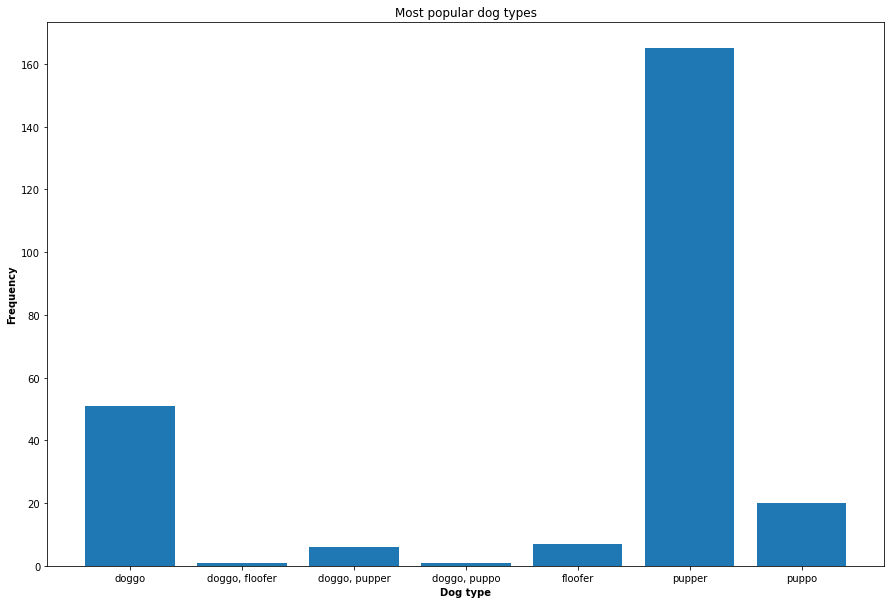

In [153]:
plt.subplots(figsize=(15, 10))
plt.bar([1, 2, 3, 4, 5, 6, 7], count_dogs, tick_label=['doggo', 'doggo, floofer', 'doggo, pupper', 'doggo, puppo', 
                                                       'floofer','pupper', 'puppo'])
plt.title('Most popular dog types')
plt.xlabel('Dog type', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.savefig('MostPopularDogTypes.png');

### Insight 4

In [164]:
retweet = twi_arch_clean.groupby(pd.Grouper(key='timestamp', freq='1w'))['retweet_count'].sum()\
.reset_index().sort_values('timestamp')[:-1]

In [165]:
favourite = twi_arch_clean.groupby(pd.Grouper(key='timestamp', freq='1w'))['favourite_count'].sum().reset_index().sort_values('timestamp')[:-1]

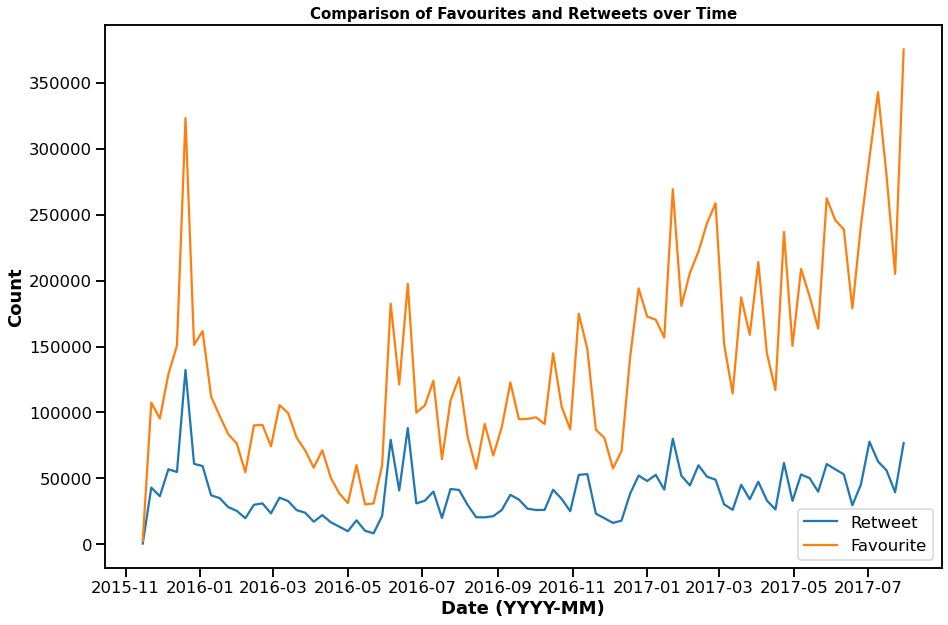

In [176]:
plt.subplots(figsize=(15, 10))
plt.plot(retweet.timestamp, retweet.retweet_count, label="Retweet")
plt.plot(favourite.timestamp, favourite.favourite_count, label="Favourite")
plt.title('Comparison of Favourites and Retweets over Time', fontsize=15, weight='bold')
plt.xlabel('Date (YYYY-MM)', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(loc=4)
plt.savefig('ComparisonofFavouritesandRetweets.png');

We can see that while retweets generally have the similar number over times with a few exceptions, tweet favourites have increased over time.

### Insight 5

In [177]:
ratings = twi_arch_clean.groupby(pd.Grouper(key='timestamp', freq='1m'))['rating'].sum()\
.reset_index().sort_values('timestamp')[:-1]

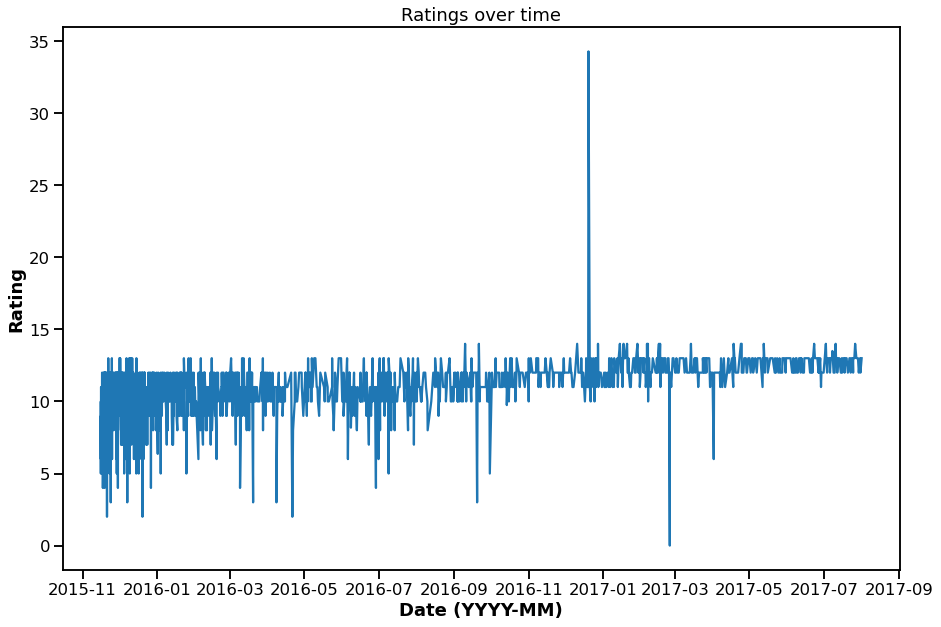

In [178]:
plt.subplots(figsize=(15, 10))
plt.plot(twi_arch_clean.timestamp, twi_arch_clean.rating)
plt.title('Ratings over time')
plt.xlabel('Date (YYYY-MM)', weight='bold')
plt.ylabel('Rating', weight='bold')
plt.savefig('RatingsOverTime.png');

We can see that ratings over time generally improved, they were lower at the start. Since March 2017, after a drop in ratings, the haver stayed pretty high (i.e. above 10)